In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'   images	 videos   YOLOv4.ipynb
 darknet.zip	    images.txt	 yolov4   YOLOv_detect_Video.ipynb


In [0]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/darknet.zip ../

In [4]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../darknet.zip 

Archive:  ../darknet.zip
   creating: darknet/
   creating: darknet/.circleci/
  inflating: darknet/.circleci/config.yml  
   creating: darknet/.github/
  inflating: darknet/.github/FUNDING.yml  
   creating: darknet/.github/ISSUE_TEMPLATE/
  inflating: darknet/.github/ISSUE_TEMPLATE/any-other-question-or-issue.md  
  inflating: darknet/.github/ISSUE_TEMPLATE/bug-report.md  
  inflating: darknet/.github/ISSUE_TEMPLATE/feature_request.md  
  inflating: darknet/.github/ISSUE_TEMPLATE/training-issue---no-detections---nan-avg-loss---low-accuracy.md  
   creating: darknet/.github/workflows/
  inflating: darknet/.github/workflows/ccpp.yml  
  inflating: darknet/.gitignore      
  inflating: darknet/.travis.yml     
   creating: darknet/3rdparty/
   creating: darknet/3rdparty/pthreads/
   creating: darknet/3rdparty/pthreads/bin/
  inflating: darknet/3rdparty/pthreads/bin/pthreadGC2.dll  
  inflating: darknet/3rdparty/pthreads/bin/pthreadVC2.dll  
   creating: darknet/3rdparty/pthreads/include

In [5]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov4

backup		  generate_train.py  obj.names	yolov4-custom.cfg
generate_test.py  obj.data	     obj.zip	yolov4_detect_videos.cfg


In [6]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [7]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [8]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unuse

# Step 4: Define Helper Functions

These three functions are helper functions that will allow you to show the image in your Colab Notebook after running your detections, as well as upload and download images to and from your Cloud VM.

In [0]:
# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [0]:
!cp /mydrive/yolov4/backup/yolov4-custom_last.weights ./

In [16]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov4/obj.zip ../
!unzip ../obj.zip -d data/
!cp /mydrive/yolov4/obj.names ./cfg
!cp /mydrive/yolov4/obj.data  ./cfg

!cp /mydrive/yolov4/obj.names ./data
!cp /mydrive/yolov4/obj.data  ./data

!cp /mydrive/yolov4/yolov4_detect_videos.cfg  ./cfg
!cp /mydrive/yolov4/generate_test.py ./

Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/obj/ASD_NW_0.jpg   
  inflating: data/obj/ASD_NW_0.txt   
  inflating: data/obj/ASD_NW_1.jpg   
  inflating: data/obj/ASD_NW_1.txt   
  inflating: data/obj/ASD_NW_115.jpg  
  inflating: data/obj/ASD_NW_115.txt  
  inflating: data/obj/ASD_NW_116.jpg  
  inflating: data/obj/ASD_NW_116.txt  
  inflating: data/obj/ASD_NW_117.jpg  
  inflating: data/obj/ASD_NW_117.txt  
  inflating: data/obj/ASD_NW_122.jpg  
  inflating: data/obj/ASD_NW_122.txt  
  inflating: data/obj/ASD_NW_123.jpg  
  inflating: data/obj/ASD_NW_123.txt  
  inflating: data/obj/ASD_NW_32.jpg  
  inflating: data/obj/ASD_NW_32.txt  
  inflating: data/obj/ASD_NW_33.jpg  
  inflating: data/obj/ASD_NW_33.txt  
  inflating: data/obj/ASD_NW_34.jpg  
  inflating: data/obj/ASD_NW_34.txt  
  inflating: data/obj/ASD_NW_35.jpg  
  inflating: data/obj/ASD_NW_35.txt  
  inflating: data/obj/ASD_NW_40.jpg  
  inflating: data/obj/ASD_NW_40.txt  
  inflating: data/obj/ASD_NW_41.jp

In [0]:
!python generate_test.py

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x

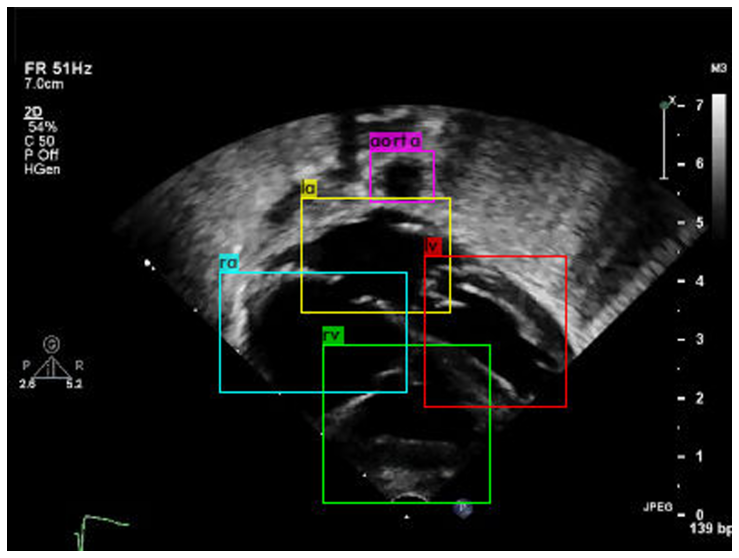

In [18]:
!./darknet detector test cfg/obj.data cfg/yolov4_detect_videos.cfg yolov4-custom_last.weights -dont_show -ext_output /mydrive/images/ASD2.jpg
imShow('predictions.jpg')

In [13]:
!./darknet detector test cfg/obj.data cfg/yolov4_detect_videos.cfg yolov4-custom_last.weights -dont_show -ext_output < /mydrive/images.txt > result.json
# download 
download('result.json')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 route  8 2 	                           ->  304 x 304 x 128 
  10 conv 

MessageError: ignored

In [0]:
!./darknet detector test cfg/obj.data cfg/yolov4_detect_videos.cfg yolov4-custom_last.weights -dont_show -ext_output < /mydrive/images.txt > result.csv
download("result.csv")

In [19]:
!./darknet detector map data/obj.data cfg/yolov4_detect_videos.cfg yolov4-custom_last.weights -dont_show -ext_output < /mydrive/images.txt > result.csv
download("result.csv")

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 route  8 2 	                           ->  304 x 304 x 128 
  10 conv 